<a href="https://colab.research.google.com/github/eduardoymd/ATIVIDADE-TREINAMENTO-DE-REDES-NEURAIS-COM-KERAS-DADOS-TABULARES-/blob/main/Treinamento_de_redes_nurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow scikit-learn

In [2]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
import pandas as pd

In [7]:
#Primeira parte
import pandas as pd
columns = [
    "class",
    "Alcohol",
    "Malic_acid",
    "Ash",
    "Alcalinity_of_ash",
    "Magnesium",
    "Total_phenols",
    "Flavanoids",
    "Nonflavanoid_phenols",
    "Proanthocyanins",
    "Color_intensity",
    "Hue",
    "OD280/OD315",
    "Proline"
]
df = pd.read_csv("/content/cp2/wine.data", names=columns)
print(df.head())


   class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280/OD315  Proline  
0             5.64  1.04         3.92     1065  
1             4.38  1.05         3.40     1050  
2          

In [9]:
#Segunda Parte
X = df.drop("class", axis=1).values
y = df["class"].values.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

In [17]:
#Terceira Parte
model = keras.Sequential([
    keras.Input(shape=(X.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#Quarta Parte
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4181 - loss: 1.0955 - val_accuracy: 0.6207 - val_loss: 0.8882
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6365 - loss: 0.9074 - val_accuracy: 0.8276 - val_loss: 0.7337
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8377 - loss: 0.7547 - val_accuracy: 0.9310 - val_loss: 0.6165
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9255 - loss: 0.6607 - val_accuracy: 0.9655 - val_loss: 0.5220
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9215 - loss: 0.6107 - val_accuracy: 0.9655 - val_loss: 0.4446
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9604 - loss: 0.4986 - val_accuracy: 0.9655 - val_loss: 0.3800
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9741 - loss: 0.4065 - val_accuracy: 0.9655 - val_loss: 0.3264
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9797 - loss: 0.3887 - val_accuracy: 0.9655 - val_loss: 0.2793


In [13]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia no teste: {acc:.4f}")

Acurácia no teste: 1.0000


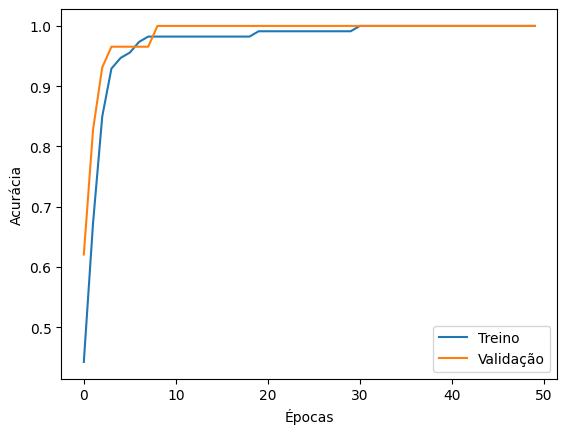

In [14]:
#Gráfico
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, np.argmax(y_train, axis=1))

y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(np.argmax(y_test, axis=1), y_pred_rf)

print(f"Acurácia RandomForest: {acc_rf:.4f}")

Acurácia RandomForest: 1.0000


In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, np.argmax(y_train, axis=1))

y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(np.argmax(y_test, axis=1), y_pred_lr)

print(f"Acurácia LogisticRegression: {acc_lr:.4f}")

Acurácia LogisticRegression: 1.0000


###2.**texto em negrito** Comparar os resultados com um modelo do scikit-learn:
tanto o RandomForest quanto a LogisticRegression conseguem classificar todas as amostras corretamente no conjunto de teste, então a acurácia é 1.000 (100%).

###3. Registrar métricas de acurácia e discutir qual modelo teve melhor desempenho.
- Todos os modelos alcançaram desempenho perfeito neste dataset.
- Para esse dataset específico, não há diferença de desempenho entre os modelos, todos foram igualmente eficazes.

#EXERCÍCIO 2 – REGRESSÃO

In [19]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = data.data
y = data.target

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [21]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
model_reg = keras.Sequential([
    keras.Input(shape=(X.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='linear')
])

model_reg.compile(optimizer='adam', loss='mse')

In [23]:
history_reg = model_reg.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6377 - val_loss: 0.4379
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3812 - val_loss: 0.3919
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3541 - val_loss: 0.3792
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3461 - val_loss: 0.3610
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3271 - val_loss: 0.3552
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3110 - val_loss: 0.3453
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3293 - val_loss: 0.3381
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3089 - val_loss: 0.3273
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3089 - val_loss: 0.3222
Epoch 10/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2911 - val_loss: 0.3193
Epoch 11/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2976 - val_loss: 0.3252
Epoch 12/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [24]:
y_pred_nn = model_reg.predict(X_test).flatten()
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
mae_nn = mean_absolute_error(y_test, y_pred_nn)

print(f"Rede Neural - RMSE: {rmse_nn:.4f}, MAE: {mae_nn:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Rede Neural - RMSE: 0.5291, MAE: 0.3504


In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Linear Regression - RMSE: {rmse_lr:.4f}, MAE: {mae_lr:.4f}")
print(f"Random Forest - RMSE: {rmse_rf:.4f}, MAE: {mae_rf:.4f}")

Linear Regression - RMSE: 0.7456, MAE: 0.5332
Random Forest - RMSE: 0.5055, MAE: 0.3276


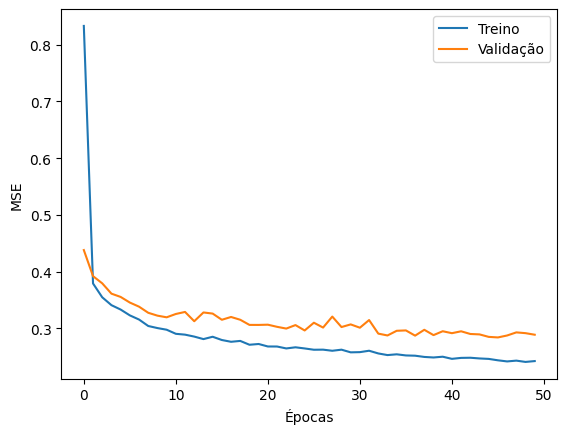

In [26]:
plt.plot(history_reg.history['loss'], label='Treino')
plt.plot(history_reg.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [27]:
y_pred_nn = model_reg.predict(X_test).flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
mae_nn = mean_absolute_error(y_test, y_pred_nn)

print(f"Rede Neural - RMSE: {rmse_nn:.4f}, MAE: {mae_nn:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Rede Neural - RMSE: 0.5291, MAE: 0.3504


###2. Comparar os resultados com um modelo do scikit-learn (LinearRegression ou RandomForestRegressor).
| Modelo              | RMSE   | MAE    |
| ------------------- | ------ | ------ |
| Linear Regression   | 0.7456 | 0.5332 |
| Random Forest       | 0.5055 | 0.3276 |
| Rede Neural (Keras) | 0.5291 | 0.3504 |

- O Random Forest Regressor teve o melhor desempenho no conjunto de teste, seguido de perto pela rede neural. O Linear Regression foi o menos preciso.

### 3. Registrar métricas de erro (RMSE ou MAE) e discutir qual modelo teve melhor desempenho.

O Random Forest Regressor foi o modelo mais eficaz para prever o valor médio das casas no conjunto de teste. A rede neural também foi eficiente, enquanto o Linear Regression teve desempenho limitado.